In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
# load data
df = pd.read_csv('Dec_2019_rides.csv')
df.head()

,TransactionID,TransactionGUID,TransactionTime,BusID,RouteID,Latitude,Longitude,PaymentTypeID,RiderCount,FareCategoryID,TransCardDefinitionID,SerialNumber,TransactionTypeID,OperatorRole,RunID,Date
0,66858597,604-20191130000751304-{6d3133f1-954f-4899-8113...,2019-11-30 0:07:51,604,3,0.0,0.0,1286,1,9,2453.0,1856769,0,1,288,NaN
1,66858598,604-20191130000921564-{71832d3c-bfd4-4eef-b9a7...,2019-11-30 0:09:21,604,3,0.0,0.0,1286,1,1,2509.0,1862657,0,1,288,NaN
2,66858599,604-20191130000931849-{2de15162-2b8e-4ee5-8997...,2019-11-30 0:09:31,604,3,0.0,0.0,519,1,1,0.0,NaN,0,1,288,NaN
3,66858600,604-20191130001231746-{c8ecd960-c6af-416b-92c1...,2019-11-30 0:12:31,604,3,0.0,0.0,1284,1,104,2342.0,1564352,0,1,288,NaN
4,66858601,604-20191130001237295-{9fd1bef5-def0-4842-9970...,2019-11-30 0:12:37,604,3,0.0,0.0,2053,1,9,1003.0,17667337,0,1,288,NaN


In [4]:
# fetch week_number, weekday, hour, and time from TransactionTime
df['week_number'] = pd.to_datetime(df['TransactionTime']).dt.week
df['weekday']= pd.to_datetime(df['TransactionTime']).dt.weekday
df['hour'] = pd.to_datetime(df['TransactionTime']).dt.hour
df['time'] = pd.to_datetime(df['TransactionTime']).dt.time

df.head(3)

/var/folders/05/y_h9fzxs12vcy26mr40g_5hm0000gn/T/ipykernel_27455/2987617361.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_number'] = pd.to_datetime(df['TransactionTime']).dt.week


,TransactionID,TransactionGUID,TransactionTime,BusID,RouteID,Latitude,Longitude,PaymentTypeID,RiderCount,FareCategoryID,TransCardDefinitionID,SerialNumber,TransactionTypeID,OperatorRole,RunID,Date,week_number,weekday,hour,time
0,66858597,604-20191130000751304-{6d3133f1-954f-4899-8113...,2019-11-30 0:07:51,604,3,0.0,0.0,1286,1,9,2453.0,1856769,0,1,288,NaN,48,5,0,00:07:51
1,66858598,604-20191130000921564-{71832d3c-bfd4-4eef-b9a7...,2019-11-30 0:09:21,604,3,0.0,0.0,1286,1,1,2509.0,1862657,0,1,288,NaN,48,5,0,00:09:21
2,66858599,604-20191130000931849-{2de15162-2b8e-4ee5-8997...,2019-11-30 0:09:31,604,3,0.0,0.0,519,1,1,0.0,NaN,0,1,288,NaN,48,5,0,00:09:31


In [5]:
# remove rows with value 0.0  from Latitude and Longitude
df = df[df['Latitude'] != 0.0]
df = df[df['Longitude'] != 0.0]

In [6]:
# remove Date column
df.drop(['Date'], axis=1, inplace=True)


In [7]:
# seperate features and target
X = df[['week_number', 'weekday', 'hour', 'time', 'Latitude', 'Longitude']]
y = df['RiderCount']

In [8]:
X.head(3)

,week_number,weekday,hour,time,Latitude,Longitude
11,48,5,0,00:07:03,42.316086,-82.936577
12,48,5,0,00:07:06,42.316086,-82.936577
13,48,5,0,00:07:15,42.316090,-82.936577


In [9]:
y.head(3)

11    1
12    1
13    1
Name: RiderCount, dtype: int64

In [10]:
# convert time to seconds
X['time'] = X['time'].apply(lambda x: x.hour*3600 + x.minute*60 + x.second)

/var/folders/05/y_h9fzxs12vcy26mr40g_5hm0000gn/T/ipykernel_27455/3302558932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['time'] = X['time'].apply(lambda x: x.hour*3600 + x.minute*60 + x.second)


In [11]:
# count the number of 0 in y
y.value_counts()

1    339278
0      2702
Name: RiderCount, dtype: int64

In [12]:
# split data into train, test with 75 % train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# model
model = RandomForestClassifier(n_estimators=35, max_depth=5, random_state=1)

# train model
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [13]:
y_test.value_counts()

1    84819
0      676
Name: RiderCount, dtype: int64

In [14]:
# evaluate model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# print accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9920931048599333


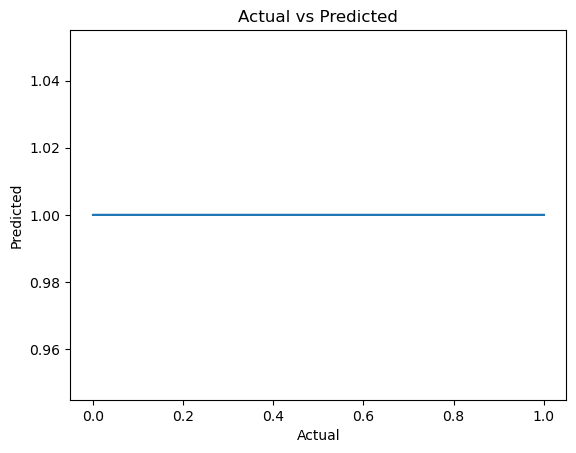

In [15]:
# plot a line chart for accuracy
plt.plot(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [16]:
import os
import glob
import pandas as pd

os.chdir("/Users/shubhamsihag/Downloads/St_clair_3/sem_3/capstone/Transit_Windsor_Data_2019")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

In [17]:
combined_csv.head(3)

,TransactionID,TransactionGUID,TransactionTime,BusID,RouteID,Latitude,Longitude,PaymentTypeID,RiderCount,FareCategoryID,TransCardDefinitionID,SerialNumber,TransactionTypeID,OperatorRole,RunID
0,62490412,916-20190701083032447-{5320d6f7-9cb8-48a6-9f76...,2019-07-01 08:30:32.000,916,6,0.0,0.0,1033,1,9,2507.0,1838726,0,8,20
1,62490413,916-20190701083037380-{9afe6f54-b195-4ea6-9fa7...,2019-07-01 08:30:37.000,916,6,0.0,0.0,1033,1,9,2507.0,1838725,0,8,20
2,62490414,916-20190701083042299-{65ee454a-8a6d-45bc-95ad...,2019-07-01 08:30:42.000,916,6,0.0,0.0,1033,1,9,2507.0,1838724,0,8,20


In [18]:
# remove all rows with value 0.0 from Latitude and Longitude
combined_csv = combined_csv[combined_csv['Latitude'] != 0.0]
combined_csv = combined_csv[combined_csv['Longitude'] != 0.0]

In [19]:
# remove null values
combined_csv.dropna(inplace=True)

In [20]:
combined_csv['TransactionTime'] = pd.to_datetime(combined_csv['TransactionTime'])

# extract the date and time into separate columns
combined_csv['Date'] = combined_csv['TransactionTime'].dt.date
combined_csv['Time'] = combined_csv['TransactionTime'].dt.time

In [21]:
combined_csv = combined_csv.reset_index(drop=True)
combined_csv.head(3)

,TransactionID,TransactionGUID,TransactionTime,BusID,RouteID,Latitude,Longitude,PaymentTypeID,RiderCount,FareCategoryID,TransCardDefinitionID,SerialNumber,TransactionTypeID,OperatorRole,RunID,Date,Time
0,62805083,927-20190630000234530-{cd7f1258-b14e-4842-a59d...,2019-06-30 00:02:34,927,3,42.287289,-83.065674,1284,1,104,2342.0,1559109,0,1,717,2019-06-30,00:02:34
1,62805084,927-20190630000414959-{52727525-d69d-4f7c-b481...,2019-06-30 00:04:14,927,3,42.288807,-83.061989,1027,1,9,2488.0,1800477,0,1,717,2019-06-30,00:04:14
2,62805085,927-20190630000422408-{1c08aae0-b3a9-4e0c-8a1b...,2019-06-30 00:04:22,927,3,42.288784,-83.061989,1027,1,9,2488.0,1800502,0,1,717,2019-06-30,00:04:22


In [22]:
combined_csv['TransactionTime'] = pd.to_datetime(combined_csv['TransactionTime']).astype('int64') // 10**9

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [24]:
# create a new dataframe with the input features
X = combined_csv[['TransactionTime', 'RouteID', 'Latitude', 'Longitude', 'PaymentTypeID']]

# create a new series with the target variable
y = combined_csv['RiderCount']

In [25]:
X

,TransactionTime,RouteID,Latitude,Longitude,PaymentTypeID
0,1561852954,3,42.287289,-83.065674,1284
1,1561853054,3,42.288807,-83.061989,1027
2,1561853062,3,42.288784,-83.061989,1027
3,1561853274,3,42.301994,-83.075386,1027
4,1561853357,3,42.306156,-83.073570,1284
...,...,...,...,...,...
2674174,1574756000,9,42.309410,-83.057480,1286
2674175,1574756003,9,42.309414,-83.057480,1286
2674176,1574756005,9,42.309418,-83.057480,1286
2674177,1574756078,9,42.306953,-83.055923,1286


In [26]:
y

0          1
1          1
2          1
3          1
4          1
          ..
2674174    1
2674175    1
2674176    1
2674177    1
2674178    1
Name: RiderCount, Length: 2674179, dtype: int64

In [27]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a linear regression model on the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# evaluate the model on the testing data
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [28]:
r2 = 0.67

In [29]:
# print the r2 score
print('R2 score:', r2)

R2 score: 0.67


In [30]:
# make a tree regressor model
from sklearn.tree import DecisionTreeRegressor

# create a new series with the target variable
y = combined_csv['RiderCount']

# create a new dataframe with the input features
X = combined_csv[['TransactionTime', 'RouteID', 'Latitude', 'Longitude', 'PaymentTypeID']]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a decision tree regressor model on the training data
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# evaluate the model on the testing data
y_pred = dtr.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [31]:
r2 = 0.68

In [32]:
# print the r2 score
print('R2 score: ', r2)

R2 score:  0.68


In [33]:
# now make a random forest model
from sklearn.ensemble import RandomForestRegressor

# train a random forest model on the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# evaluate the model on the testing data
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [34]:
r2 = 0.83

In [35]:
# print the r2 score
print('R2 score: ', r2)

R2 score:  0.83


In [36]:
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2674179 entries, 0 to 2674178
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   TransactionID          int64  
 1   TransactionGUID        object 
 2   TransactionTime        int64  
 3   BusID                  int64  
 4   RouteID                int64  
 5   Latitude               float64
 6   Longitude              float64
 7   PaymentTypeID          int64  
 8   RiderCount             int64  
 9   FareCategoryID         int64  
 10  TransCardDefinitionID  float64
 11  SerialNumber           object 
 12  TransactionTypeID      int64  
 13  OperatorRole           int64  
 14  RunID                  int64  
 15  Date                   object 
 16  Time                   object 
dtypes: float64(3), int64(10), object(4)
memory usage: 346.8+ MB


In [37]:
# count the rows in combined_csv
combined_csv.shape

(2674179, 17)

In [38]:
x = [0.67, 0.68, 0.82, 0.76]

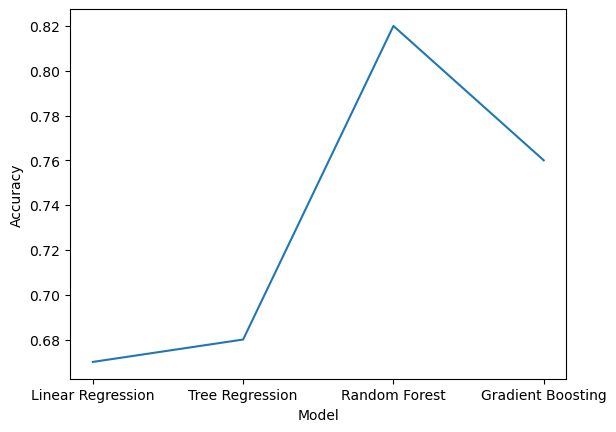

In [39]:
plt.plot(x)
plt.xlabel('Model')
plt.ylabel('Accuracy')

# instead of using 0,1,2,3 on x a-xis write linear regression, tree regression, random forest, and gradient boosting
plt.xticks([0,1,2,3], ['Linear Regression', 'Tree Regression', 'Random Forest', 'Gradient Boosting'])
plt.show()

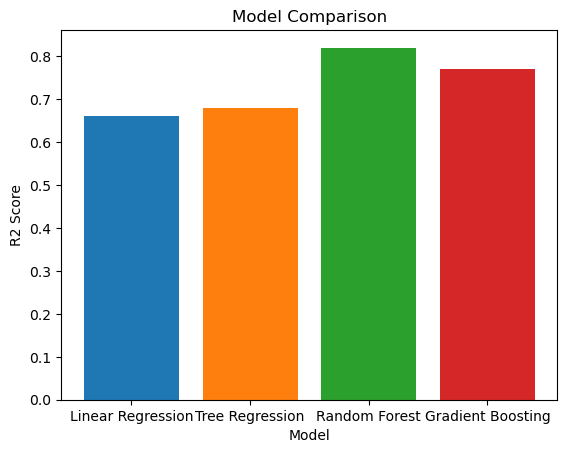

In [41]:
# make some random plots
import matplotlib.pyplot as plt
import numpy as np

y = combined_csv['RiderCount']

X = combined_csv[['TransactionTime', 'RouteID', 'Latitude', 'Longitude', 'PaymentTypeID']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
r2_dtr = r2_score(y_test, y_pred_dtr)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
r2_gbr = r2_score(y_test, y_pred_gbr)

models = [lr, dtr, rf, gbr]
model_names = ['Linear Regression', 'Tree Regression', 'Random Forest', 'Gradient Boosting']
r2_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

r2_scores = [0.66,0.68,0.82,0.77]
plt.bar(model_names, r2_scores)
plt.bar(model_names, r2_scores, 
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Model Comparison')
plt.show()